<a href="https://colab.research.google.com/github/dayaYanez/MLTSA25_DYanez/blob/main/Class3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pylab as plt

In [7]:
dfgrouped = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv', index_col=0)

In [8]:
dfgrouped


,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742
...,...
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615


In [9]:
dfgrouped.tail


<bound method NDFrame.tail of                  Volume
Date                   
2012-01-01    10.000000
2012-01-02    10.100000
2012-01-03   107.085281
2012-01-04   107.233260
2012-01-05    70.328742
...                 ...
2014-12-29  5317.387194
2014-12-30  7673.202917
2014-12-31  7567.614615
2015-01-01  4791.695273
2015-01-02  1651.384036

[1098 rows x 1 columns]>

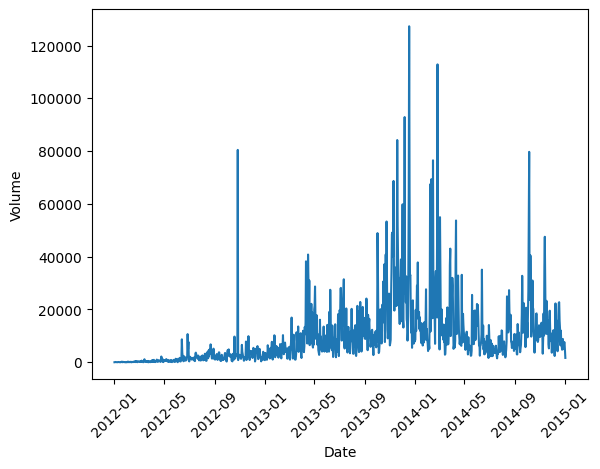

In [19]:
plt.plot(dfgrouped.index, dfgrouped['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45);
plt.show()

In [12]:
pd.to_datetime(dfgrouped.index)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-27',
               '2014-12-28', '2014-12-29', '2014-12-30', '2014-12-31',
               '2015-01-01', '2015-01-02'],
              dtype='datetime64[ns]', name='Date', length=1098, freq=None)

In [13]:
dfgrouped.index = pd.to_datetime(dfgrouped.index)

In [18]:
dfshort = dfgrouped.iloc[200:500]

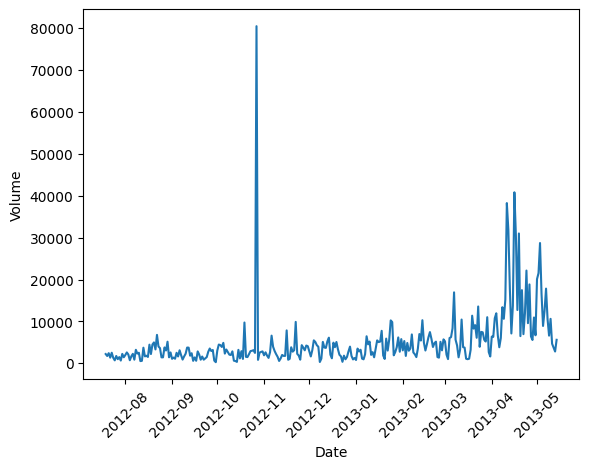

In [20]:
plt.plot(dfshort.index, dfshort['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45);
plt.show()

In [35]:
rollingobject = dfshort.rolling(window=10, center=True)

In [36]:
m = rollingobject.mean()
s = rollingobject.std()

<Axes: xlabel='Date'>

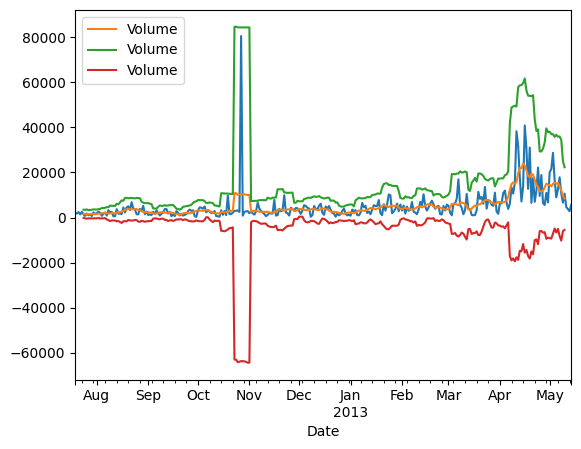

In [41]:
ax = dfshort['Volume'].plot()
m.plot(ax=ax)
(m + 3*s).plot(ax=ax)
(m - 3*s).plot(ax=ax)


In [38]:
import numpy as np
np.where((dfshort['Volume'] < (m['Volume'] - 3*s['Volume']) ) + (dfshort['Volume'] > (m['Volume'] + 3*s['Volume']) ))


(array([], dtype=int64),)

In [47]:
m1 = dfshort['Volume'].rolling(window=11, center=True).apply(lambda x:np.mean(  np.concatenate([x[:10], x[11:] ]) ))
s1 = dfshort['Volume'].rolling(window=11, center=True).apply(lambda x:np.std(  np.concatenate([x[:10], x[11:] ]) ))

<Axes: xlabel='Date'>

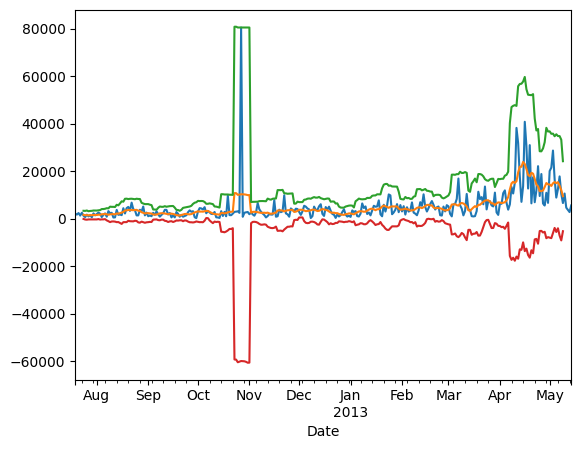

In [48]:
ax = dfshort['Volume'].plot()
m1.plot(ax=ax)
(m1 + 3*s1).plot(ax=ax)
(m1 - 3*s1).plot(ax=ax)
